 # Cookies Datathon 

fksdflskdjglfdjgkldfjgkldfjlsgjdfklg

In [1]:
# for DataFrames
import numpy as np
import pandas as pd


# for graphing
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


# for stats + stat testing
import scipy as sp
from scipy import stats 


In [2]:
# setting sns and matloplib styles
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1,  rc={"lines.linewidth": 1.5})

In [3]:
df = pd.read_csv("../Data/cookies.csv")

#### Basic data info 

In [4]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [5]:
df.columns

Index(['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'quality', 'butter type', 'weight', 'diameter', 'mixins',
       'crunch factor', 'aesthetic appeal'],
      dtype='object')

In [6]:
df.shape

(5198, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
sugar to flour ratio    5198 non-null float64
sugar index             5193 non-null float64
bake temp               5198 non-null int64
chill time              5198 non-null float64
calories                5198 non-null float64
density                 5198 non-null float64
pH                      5198 non-null float64
grams baking soda       5198 non-null float64
bake time               5188 non-null float64
quality                 5198 non-null int64
butter type             5198 non-null object
weight                  5198 non-null float64
diameter                5198 non-null int64
mixins                  5196 non-null object
crunch factor           5198 non-null float64
aesthetic appeal        5198 non-null int64
dtypes: float64(10), int64(4), object(2)
memory usage: 649.8+ KB


##### Initial statistics overview

In [8]:
df.describe()
# target is quality: index between (we think 0 and 10) but data specifies 3 to 11 - this will be reviewed later
# aesthetic appeal seems to be either 3 or 4 - we will look into this for more info
# crunch is between 1 and 2 - float (not cathegorical value)

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5198.000000,5193.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5188.000000,5198.000000,5198.000000,5198.0,5198.000000,5198.000000
mean,0.318049,5.402465,559.638322,30.390246,115.015294,0.995819,8.222020,0.530864,10.494758,7.325125,14.381935,7.0,1.499367,3.000577
std,0.150036,4.668342,353.274062,17.268403,56.506171,0.062193,0.283323,0.150886,1.194584,1.302780,3.023740,0.0,0.289205,0.024019
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.000000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.250000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.505000,10.300000,8.000000,14.000000,7.0,1.500000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996908,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.750000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.000000,4.000000


##### Checking NaNs

In [9]:
# look at proportion on NAN to data
df.isnull().sum()
df.isnull().sum()/len(df)*100 

sugar to flour ratio    0.000000
sugar index             0.096191
bake temp               0.000000
chill time              0.000000
calories                0.000000
density                 0.000000
pH                      0.000000
grams baking soda       0.000000
bake time               0.192382
quality                 0.000000
butter type             0.000000
weight                  0.000000
diameter                0.000000
mixins                  0.038476
crunch factor           0.000000
aesthetic appeal        0.000000
dtype: float64

In [10]:
# As we can have cookies with no mixins, we will not drop that type
# Instead we will replace the nan with a "No mixins" label
print(df["mixins"].unique())
df["mixins"].fillna("No mixins", inplace=True)

['raisins' 'nuts, chocolate' 'chocolate' 'nuts, oats, chocolate'
 'chocolate, oats' 'raisins, oats' 'nuts,raisins' 'nuts, oats'
 'chocolate, peanut butter' 'chocolate, oats, peanut butter'
 'peanut butter' nan 'peanut butter, raisins' 'oats']


In [11]:
# for the sugar index nans and the temperature nans
# as the proportion of data is so low, we will jsut drop them 
# Cookies with no bake time are not useful as bake time is a very important factor to the cookie 
# we will therefore drop these out
df.dropna(inplace=True)

##### Checking correlations and distributions

For the initial analysis, to see relationships between variables, we do a pairplot. 
Here we quickly see that there are a few outliers that need to be considered and that we have some highly skewed distributions. 
We also see that there are some columns where the data is not useful for our anlysis:
- Density (density 5 is not realisitc, all other values do not have enough variation for the variable to be useful for a comparison)
- Diameter (mostly the diameters are very similar)
- Aesthetic appeal (we do not know the range of the scores, therefore using this data can lead to future missinterpretations. Added to this, most of the data is within the score = 3 group, with only a few observations at 4)

In [12]:
# relationship analysis 1
#sns.pairplot(df)

In [13]:
# dropping columns that are not wanted
df.drop(["density", "aesthetic appeal", "diameter"], axis=1, inplace=True)

In [14]:
# relationship analysis 2 (post dropping)
#sns.pairplot(df)

#### Further notes:
Again, we see that we have outliers which are not allowing us to fully interprete the data as they skewe our results (eg. weight = -100).

We also see below, that we have no significant correlations which will allow us to remove any non-significant variables for a ML model. 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

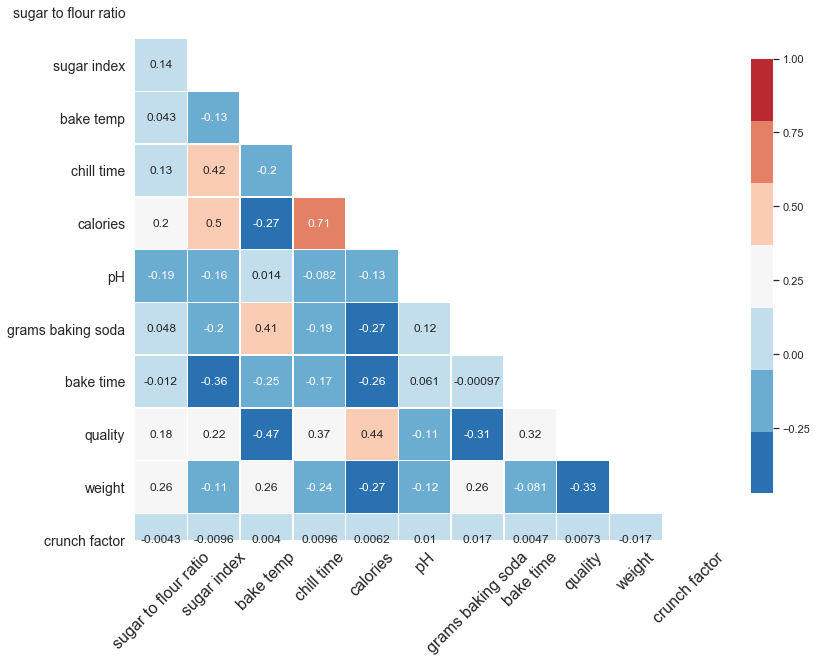

In [15]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(13, 16))

cmap = sns.color_palette("RdBu_r", 7)

sns.heatmap(df.corr(), annot=True, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(rotation=360, fontsize=14)

plt.xticks(rotation=45, fontsize=16)

##### Outlier removal

In [16]:
# removing values with z score greater than 3
# step 1: removing any object/ categorical values
categorical = df.select_dtypes(include=object)

# steop 2: creating numeric df
df_numeric = df.drop(categorical, axis=1)

# step 3: removing z scores 
df_clean= df_numeric[(np.abs(stats.zscore(df_numeric))<3).all(axis=1)]

# step 4: meging data back in
df_z = df_clean.merge(categorical, how="left", left_index=True, right_index=True)

In [25]:
col_lst = ['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'pH', 'grams baking soda', 'bake time',
       'quality', 'butter type', 'weight', 'mixins',
       'crunch factor']
df_z = df_z[col_lst]

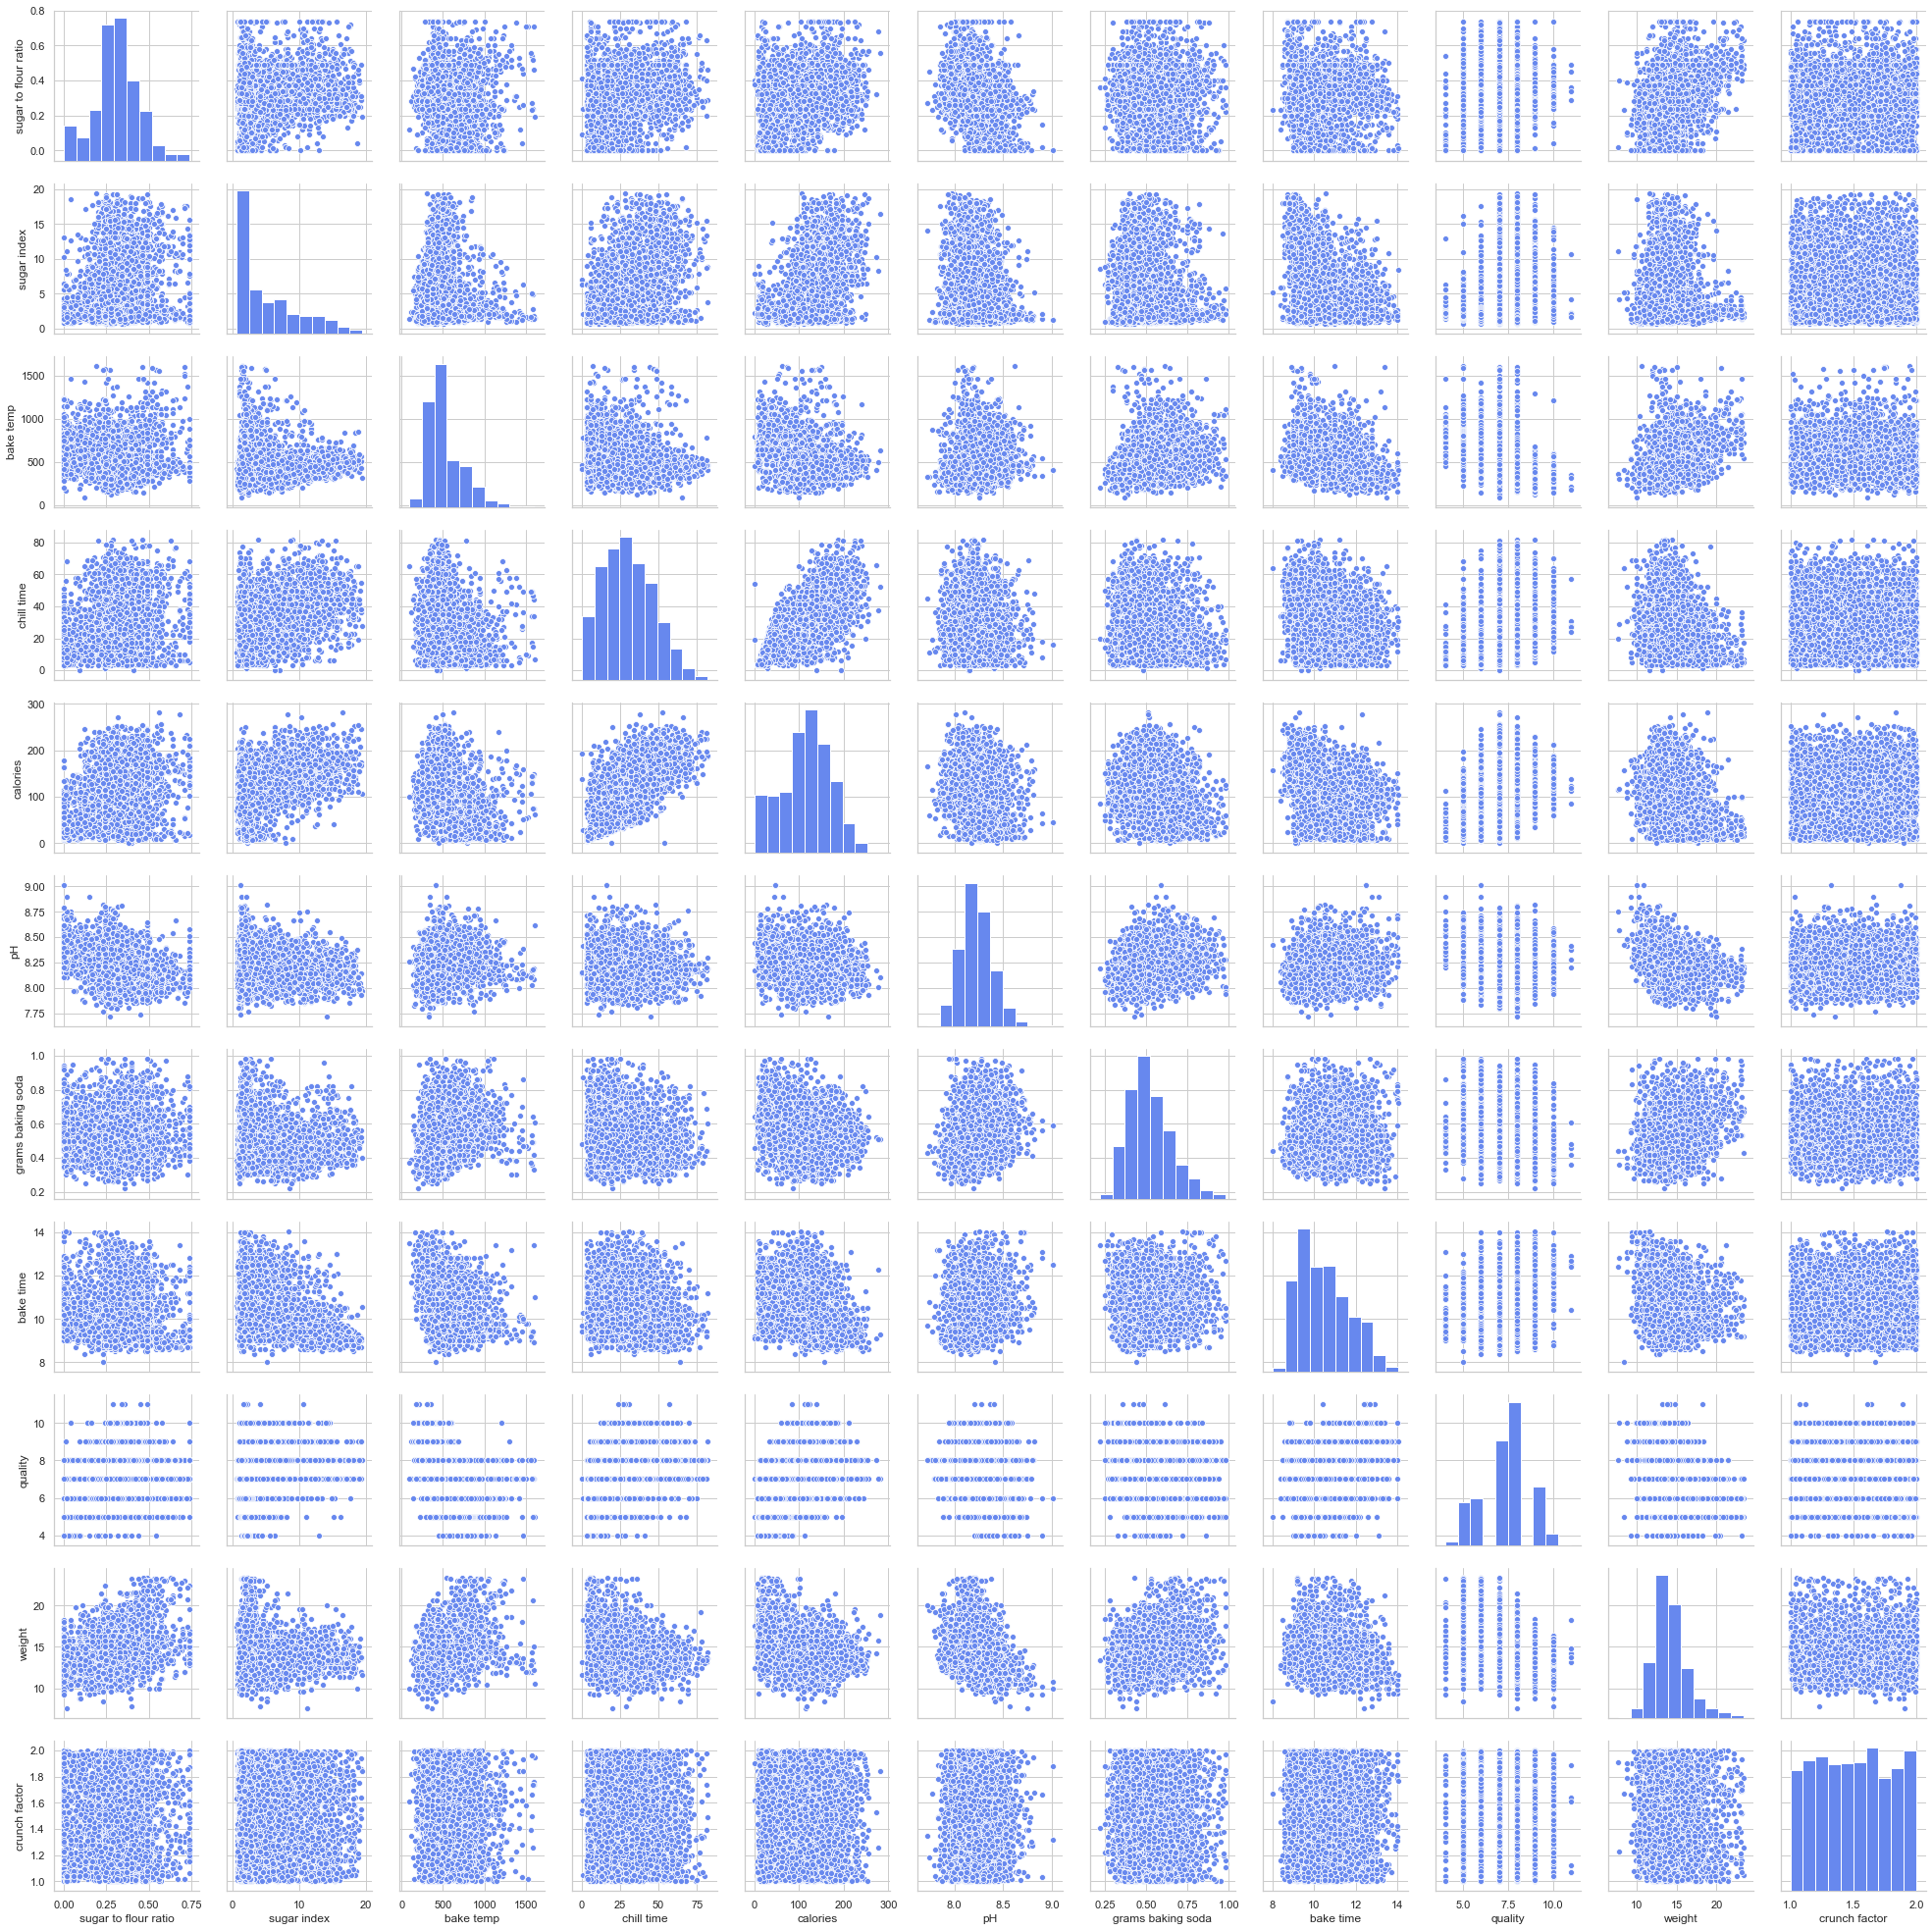

In [17]:
sns.pairplot(df_z)

In [19]:
df_z.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,weight,crunch factor
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,0.309849,5.387653,521.037082,30.195599,115.871129,8.223635,0.521473,10.519123,7.373472,14.223452,1.498969
std,0.135390,4.577115,213.689065,16.112892,54.687435,0.161085,0.128944,1.196201,1.281655,2.219149,0.289560
min,0.000000,0.600000,90.000000,0.000000,0.000000,7.720000,0.220000,8.000000,4.000000,7.600000,1.000000
25%,0.240000,1.800000,370.000000,17.000000,80.000000,8.120000,0.430000,9.500000,7.000000,12.800000,1.250000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,8.210000,0.500000,10.400000,8.000000,13.800000,1.500000
75%,0.380000,8.000000,610.000000,41.000000,154.250000,8.330000,0.590000,11.300000,8.000000,15.200000,1.750000
max,0.740000,19.400000,1610.000000,82.000000,282.000000,9.010000,0.980000,14.050000,11.000000,23.400000,2.000000


1. We are considerig industrial baking ovens and industrial processing lines, this means that baking temperatures can be substantially hgher than those we use at home. 
2. We have allready removed those values with a greater z score, so even if our values are still high, as we do not have high expertese on baking production lines, we will leave the higher values inside the DF (industrial ovens can reach temperuatres of 1000F)

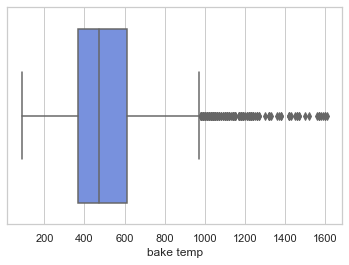

In [24]:
sns.boxplot(df_z["bake temp"])


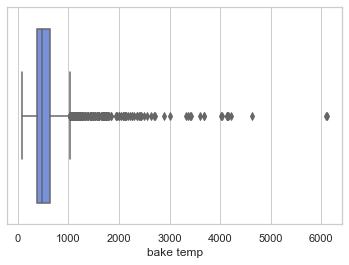

In [32]:
sns.boxplot(df["bake temp"])

We are aware, that some of the measurements for calories are not included in the final dataset, we also notes some very low calorie counts. However, we have to keep in mind that we generalize our analysis and we do not want it to be bias. Therefore we will use the same process to remove outliers for all of our data, and not change any specific column according to our expectations. 

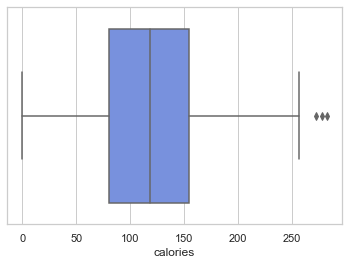

In [27]:
sns.boxplot(df_z["calories"])

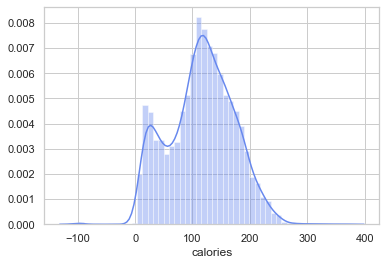

In [30]:
sns.distplot(df["calories"])

In [33]:
df_z.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor
0,0.25,9.5,300,15.0,136.0,8.10,0.44,12.1,8,melted,15.2,raisins,1.30
1,0.23,3.3,520,34.0,113.0,8.16,0.48,8.4,7,melted,12.4,raisins,1.71
2,0.18,1.9,360,33.0,106.0,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78
3,0.18,10.5,490,41.0,124.0,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59
4,0.24,2.4,770,6.0,33.0,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30


In [35]:
df_z.to_csv("../Data/cleaned_cookie_data.csv")